In [163]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

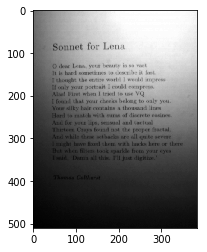

In [164]:
img = cv2.imread('sonnet.png', 0)
plt.imshow(img, cmap='gray')
img = np.float32(img)

In [165]:
sz1 = 15
threshold = 0.03
nbins = 256

In [170]:
def thresholding(im,nbins):
    bin_number = plt.hist(img.ravel(), nbins, (0, 256))
    p_matrix = bin_number[0] / np.sum(bin_number[0])
    w1_matrix = np.cumsum(p_matrix)
    mu1_matrix = np.cumsum(p_matrix * (np.arange(len(p_matrix)) + 1)) / w1_matrix
    mu1_matrix = np.nan_to_num(mu1_matrix)
    w2_matrix = 1 - w1_matrix
    mu2_matrix = (np.sum(p_matrix * (np.arange(len(p_matrix)) + 1)) - \
                  np.cumsum(p_matrix * (np.arange(len(p_matrix)) + 1))) / w2_matrix
    sigma_b = w1_matrix * w2_matrix * (mu1_matrix - mu2_matrix) ** 2
    t_star = np.argmax(sigma_b) + 1
    thresh_opt = (t_star - 1) / (nbins - 1) * 255
    im_new = np.copy(im)
    im_new[im_new < thresh_opt] = 0
    im_new[im_new >= thresh_opt] = 255
    return im_new

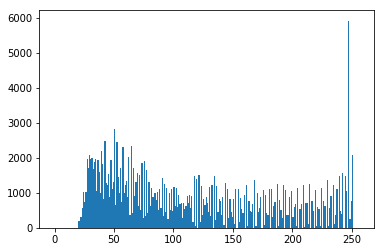

In [171]:
masked_img = thresholding(img, nbins)

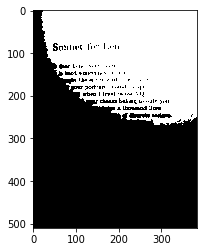

In [172]:
plt.imshow(masked_img, cmap='gray')

In [173]:
def adaptive_thresholding(im,sz,threshold):
    im_new = np.copy(im)
    img_blur = cv2.blur(im_new, (sz, sz))
    img_blur = img_blur - im_new
    img_blur = img_blur - threshold * 255
    img_blur[img_blur > 0] = 255
    img_blur[img_blur <= 0] = 0
    img_blur = img_blur * -1 + 255
    return img_blur

In [174]:
ada_masked_img = adaptive_thresholding(img, sz1, threshold)

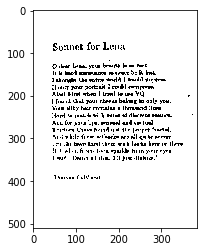

In [175]:
plt.imshow(ada_masked_img, cmap='gray')

In [224]:
sz = [50, 25, 10]
diff = 0.2
err_flag = 0

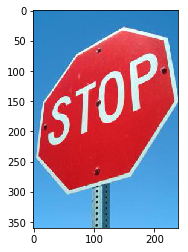

In [225]:
img2 = cv2.imread('superpix.jpg', 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [226]:
img2_gray = np.float32(cv2.imread('superpix.jpg', 0))

In [265]:
def superpixel(im,sz,diff):
    mask = np.zeros_like(im)
    w, h = im.shape
    x, y = np.indices((w, h))
    row = 0
    superPx_count = 1
    while row < w:
        notZero = np.where(mask[row, :] == 0)[0]
        while len(notZero) != 0:
            col = notZero[0]
            density = (im - im[row, col]) < diff
            distance = ((x - row) ** 2 + (y - col) ** 2) < sz ** 2
            assign = (mask == 0)
            mask[density * distance * assign] = superPx_count
            superPx_count += 1
            notZero = np.where(mask[row, :] == 0)[0]
        row += 1
    return mask

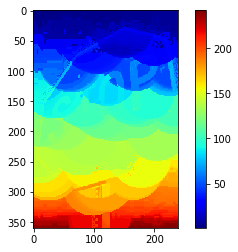

In [270]:
mm0 = superpixel(im2_gray, sz[0], diff)
plt.imshow(mm0, cmap='jet')
plt.colorbar()

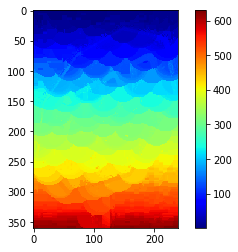

In [267]:
mm1 = superpixel(im2_gray, sz[1], diff)
plt.imshow(mm1, cmap='jet')
plt.colorbar()

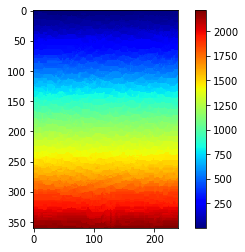

In [268]:
mm2 = superpixel(im2_gray, sz[2], diff)
plt.imshow(mm2, cmap='jet')
plt.colorbar()